In [1]:
!pip install librosa


In [ ]:
pip install matplotlib


In [ ]:
import os
from  IPython.display import Audio
import librosa
import librosa.display as disp
import matplotlib.pyplot as plt
import  numpy as np
import random
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,Dropout,LSTM,TimeDistributed,Flatten,BatchNormalization
from tensorflow.keras.models import Sequential
from keras.layers import Conv1D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau ,EarlyStopping
#from matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [ ]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.1 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import numpy as np
import librosa
from tensorflow.keras.models import load_model


In [ ]:
#path = r'/Users/rahaf/Desktop/Speech Emotion Recognition/speech-emotion-recognition-ravdess-data'

# الحصول على قائمة المجلدات في المسار
#folders = os.listdir(path)

#print(folders)

from google.colab import drive
drive.mount('/content/drive', force_remount=True)



Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/


 -8770135794491625077.mp4
 airports.gsheet
 Aryam_Abdullatif.zip
'‪Baims _ Cs224-MidReview - Google Chrome‬ 2023-10-22 20-07-35.mp4'
'Bakery sales March 2020.gsheet'
 BFS.gdoc
'car_price_prediction (1).gsheet'
 Car_Price_Report_.gdoc
'‪Class Collaborate - Tree (2) - recording_1 - Google Chrome‬ 2023-11-23 15-18-31.mp4'
'Colab Notebooks'
'Cosmetics Inc. - Data for Cleaning (1).gsheet'
'Cosmetics Inc. - Data for Cleaning.gsheet'
'Cosmetics Inc. - Data for Pivot Table and VLOOKUP.gsheet'
 data.csv
'Data Spreadsheet for "Cleaning with Spreadsheets" .gsheet'
 emotion_model.h5
 FYP5.mp4
'Global Logistics Association - Data to Merge (1).gsheet'
'Global Logistics Association - Data to Merge.gsheet'
'International Logistics Association Memberships - Data for Cleaning.gsheet'
"Jeff's Party Planet - Data for Cleaning.gsheet"
 KAUST
'Kotobati - مكتبة كتوباتي - لأنك الله.pdf'
 Lab1.gdoc
 Lab2.gdoc
'Lab3 (1).gdoc'
 Lab3.gdoc
 Lab4-ai.gdoc
 Lab4.gdoc
'Lab 4 .gdoc'
 Lab5.gdoc
'Lab 6.gdoc'
 Lab6.gdoc


In [ ]:
import zipfile
import os

# أول شيء نحدد المسار
zip_path = '/content/drive/MyDrive/speech-emotion-recognition-ravdess-data.zip'

# نفك الضغط
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/speech-emotion-recognition-ravdess-data')

# الآن نقرأ الملفات بعد فك الضغط
path = '/content/drive/MyDrive/speech-emotion-recognition-ravdess-data'
folders = os.listdir(path)

print(folders)


['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [ ]:


def load_data(path):
    f_emotions = []
    f_pathes = []
    folders = os.listdir(path)

    for folder in folders:
        folder_path = os.path.join(path, folder)
        if not os.path.isdir(folder_path):  # تجاهل الملفات غير المجلدات
            continue
        files = os.listdir(folder_path)
        for file in files:
            stp = file.split('.')[0]
            stp = stp.split('-')[2]
            f_emotions.append(int(stp))
            f_pathes.append(os.path.join(folder_path, file))

    return [f_emotions, f_pathes]

def get_emotion(number):
    info = {
        1: 'netural',
        2: 'calm',
        3: 'happy',
        4: 'sad',
        5: 'angry',
        6: 'fearfull',
        7: 'disgust',
        8: 'surprised'
    }
    return info[number]

emotions, pathes = load_data(path)


In [ ]:
def read_audio(path):
    data ,sample_rate = librosa.load(path , duration= 2.4 , offset=0.6)
    return data ,sample_rate

def draw_wave(path,data, sr):
    plt.figure(figsize=(10,4))
    #data, sr = librosa.load(path)
    plt.title('Audio wave :: ' +path, size =17)
    disp.waveshow(data, sr=sr)
    plt.show()

def draw_spectogram(path,data, sr):
    plt.figure(figsize=(10,4))
    #data, sr = librosa.load(path)
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(X)
    plt.title('spectograme  for wave :: ' +path, size =17)
    disp.specshow(Xdb, sr=sr,x_axis = 'time' , y_axis= 'hz')
    plt.show()

def add_noise(data,sr):
    noise = 0.035*np.random.uniform()*np.amax(data)
    data += noise * np.random.normal(size=data.shape[0])
    return data , sr

def pitch(data , sr, factor = 0.7):
  pitched = librosa.effects.pitch_shift(y = data , sr = sr , n_steps = factor)
  return pitched, sr

In [ ]:
def feauture_extraction(data , sr):
  mfcc = librosa.feature.mfcc(y=data , sr = sr)
  return mfcc

In [ ]:
funcs = ['Standard', add_noise ,pitch ] # للتجربه فقط
random.choice(funcs)


'Standard'

In [ ]:
def processing_audio(data,sr,options):
  func = random.choice(options)
  if func == "Standard":
    processd = data
  else:
    processd , _ = func(data , sr)

  return processd


20
calm


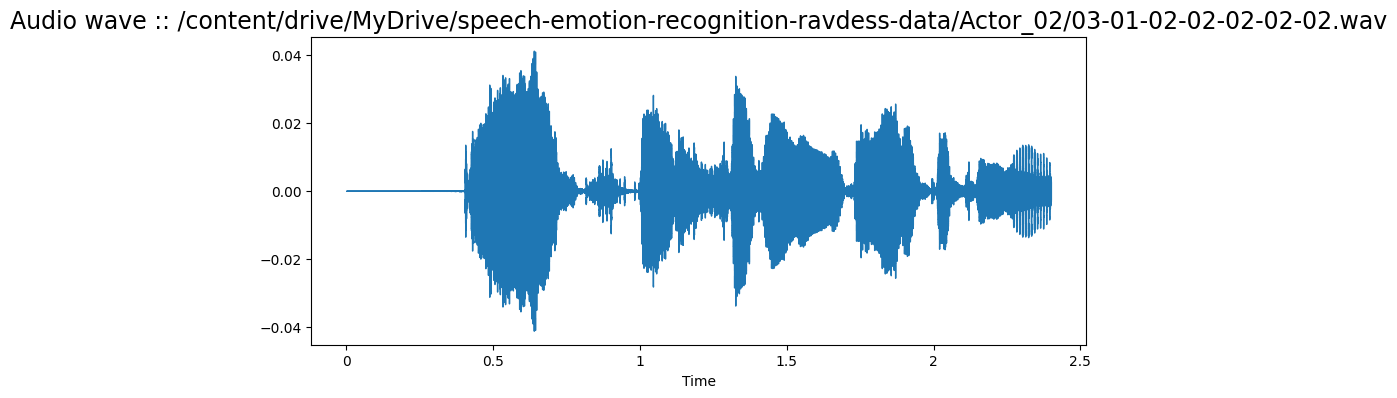

<ipython-input-36-1bfd41b26839>:16: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  Xdb = librosa.amplitude_to_db(X)


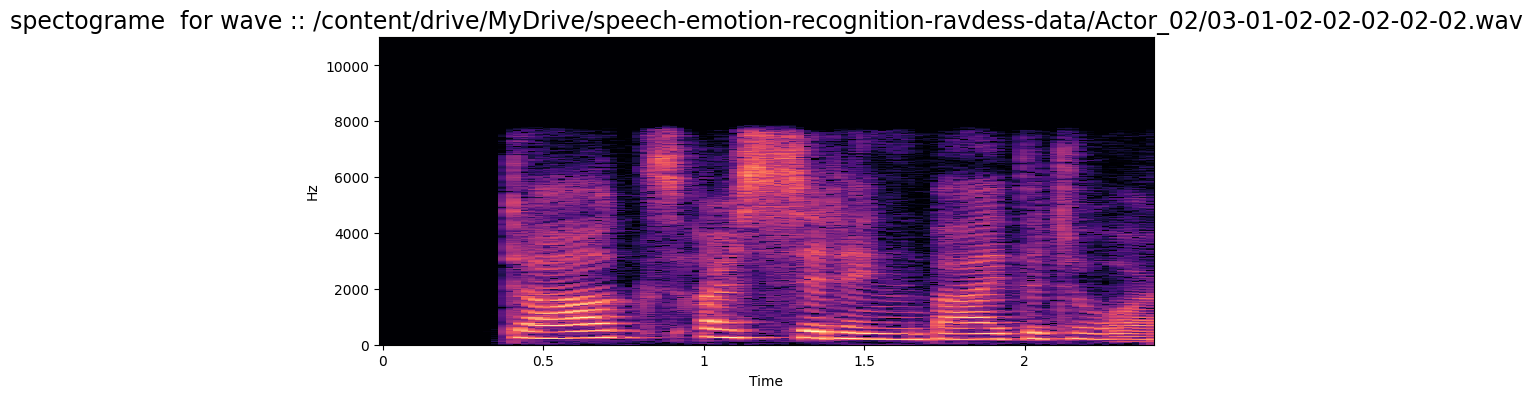

(52920,)

In [ ]:
def get_features(path):
  data, sample_rate = read_audio(path)

  funcs = ['Standard', add_noise ,pitch ]
  random.choice(funcs)
  features = []

  fun1_data =  processing_audio(data,sample_rate , funcs)
  fun2_data =  processing_audio(fun1_data,sample_rate , funcs)
  feature = feauture_extraction(fun2_data , sample_rate)
  if feature.shape == (20,104):
      features.append(feature)

  fun1_data =  processing_audio(data,sample_rate , funcs)
  fun2_data =  processing_audio(fun1_data,sample_rate , funcs)
  feature = feauture_extraction(fun2_data , sample_rate)
  if feature.shape == (20,104):
      features.append(feature)

  fun1_data =  processing_audio(data,sample_rate , funcs)
  fun2_data =  processing_audio(fun1_data,sample_rate , funcs)
  feature = feauture_extraction(fun2_data , sample_rate)
  if feature.shape == (20,104):
      features.append(feature)


  return features










def display(number) :
  data, sample_rate = read_audio(pathes[number])
  mfcc_features = feauture_extraction(data ,sample_rate)
  print(len(mfcc_features))
  print(get_emotion(emotions[number]))
  draw_wave(pathes[number],data, sample_rate)
  draw_spectogram(pathes[number], data, sample_rate)
  return data, sample_rate

d,sr=display(70)
Audio(data =d,rate = sr)
d.shape

In [ ]:
info ={ 1:'netural',
            2 :'calm',
            3 :'happy',
            4 :'sad',
            5 :'angry',
            6 :'fearfull',
            7 : 'disgust',
            8 : 'surprised'}
info[2]

'calm'

In [ ]:
X = []
Y = []

for index in range(len(pathes)):
    value = get_features(pathes[index])
    if value  != []:
      for item in value :
        X.append(item)
        Y.append(np.eye(8)[emotions[index]-1])




In [ ]:
"""for index in range(len(pathes)):
   print(get_emotion(emotions[index]))"""


encoder = OneHotEncoder()



encoder.fit_transform(np.array([1,2,3,4,1,5,6,7,8]).reshape(-1,1)).toarray()



array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(np.array(X), np.array(Y), test_size= 0.2 , random_state=11 , shuffle= True)

print("Train x shape",x_train.shape)
print("Test x  shape",x_test.shape)
print("Train y shape",y_train.shape)
print("test y shape",y_test.shape)

Train x shape (3451, 20, 104)
Test x  shape (863, 20, 104)
Train y shape (3451, 8)
test y shape (863, 8)


In [ ]:
trainX = np.expand_dims(x_train , axis= 3)
trainX = np.expand_dims(trainX , axis= 3)
trainX = np.swapaxes(trainX,1,2)
print("TrainX",trainX.shape)


testX = np.expand_dims(x_test , axis= 3)
testX = np.expand_dims(testX , axis= 3)
testX = np.swapaxes(testX,1,2)
print("testX",testX.shape)


inputShape = trainX.shape[1:]
inputShape

TrainX (3451, 104, 20, 1, 1)
testX (863, 104, 20, 1, 1)


(104, 20, 1, 1)

In [ ]:
# نزيل البعد الزائد (الأخير)
trainX = np.squeeze(trainX, axis=-1)
testX = np.squeeze(testX, axis=-1)

# نطبع للتأكد
print("TrainX:", trainX.shape)
print("TestX:", testX.shape)

# ناخذ input shape بعد التصحيح
inputShape = trainX.shape[1:]
print("inputShape:", inputShape)


TrainX: (3451, 104, 20, 1)
TestX: (863, 104, 20, 1)
inputShape: (104, 20, 1)


In [ ]:
def createModel(inputShape):
  model = Sequential()
  model.add(TimeDistributed(Conv1D(32, 3, padding = 'same', activation='relu'), input_shape = inputShape ))
  model.add(TimeDistributed(BatchNormalization()))

  model.add(TimeDistributed(Flatten()))

  model.add(LSTM(64))
  model.add(Dropout(0.2))
  model.add(Dense(units=64 , activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(units=64 , activation='relu'))
  model.add(Dense(units=8 , activation='softmax'))

  return model


"""from keras.models import Sequential
from keras.layers import TimeDistributed, Conv1D, BatchNormalization, Flatten, LSTM, Dense, Dropout, Input

def createModel(inputShape):
    model = Sequential()

    model.add(TimeDistributed(Conv1D(32, 3, padding='same', activation='relu'), input_shape=inputShape))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(Flatten()))

    model.add(LSTM(64))  # LSTM يقرأ التسلسل بعد الـ Flatten
    model.add(Dropout(0.2))

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(64, activation='relu'))
    model.add(Dense(8, activation='softmax'))  # التصنيف النهائي

    return model"""






"from keras.models import Sequential\nfrom keras.layers import TimeDistributed, Conv1D, BatchNormalization, Flatten, LSTM, Dense, Dropout, Input\n\ndef createModel(inputShape):\n    model = Sequential()\n\n    model.add(TimeDistributed(Conv1D(32, 3, padding='same', activation='relu'), input_shape=inputShape))\n    model.add(TimeDistributed(BatchNormalization()))\n    model.add(TimeDistributed(Flatten()))\n\n    model.add(LSTM(64))  # LSTM يقرأ التسلسل بعد الـ Flatten\n    model.add(Dropout(0.2))\n\n    model.add(Dense(64, activation='relu'))\n    model.add(Dropout(0.2))\n\n    model.add(Dense(64, activation='relu'))\n    model.add(Dense(8, activation='softmax'))  # التصنيف النهائي\n\n    return model"

In [ ]:
model = createModel(inputShape)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_3              │ (None, 104, 20, 32)    │           128 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, 104, 20, 32)    │           128 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_5              │ (None, 104, 640)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │       180,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 189,576 (740.53 KB)

 Trainable params: 189,512 (740.28 KB)

 Non-trainable params: 64 (256.00 B)

In [ ]:
#files

In [ ]:
print(emotions[:5])
print(pathes[:5])


[1, 1, 1, 1, 2]
['/content/drive/MyDrive/speech-emotion-recognition-ravdess-data/Actor_01/03-01-01-01-01-01-01.wav', '/content/drive/MyDrive/speech-emotion-recognition-ravdess-data/Actor_01/03-01-01-01-02-01-01.wav', '/content/drive/MyDrive/speech-emotion-recognition-ravdess-data/Actor_01/03-01-01-01-01-02-01.wav', '/content/drive/MyDrive/speech-emotion-recognition-ravdess-data/Actor_01/03-01-01-01-02-02-01.wav', '/content/drive/MyDrive/speech-emotion-recognition-ravdess-data/Actor_01/03-01-02-01-01-01-01.wav']


In [ ]:
#trainig the model
opt = Adam(learning_rate=0.01)
model.compile(optimizer = opt,loss = 'categorical_crossentropy',
               metrics=['accuracy'])
reduce = ReduceLROnPlateau(monitor = 'val_loss', factor =0.6, verbose =1 , patience=5 ,min_lr = 1e-8)
stop = EarlyStopping(monitor ='val_loss',patience=10)
hist = model.fit(trainX,y_train, batch_size=140,epochs=80 ,validation_data=(testX,y_test),callbacks=[reduce,stop])# المفروض تكون 80 ايبوك بس حطيت واحد اسرع بالكدنق

Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 203s 6s/step - accuracy: 0.8197 - loss: 0.5670 - val_accuracy: 0.5886 - val_loss: 1.2613 - learning_rate: 0.0100
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 191s 5s/step - accuracy: 0.8179 - loss: 0.5052 - val_accuracy: 0.5898 - val_loss: 1.3972 - learning_rate: 0.0100
Epoch 3/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 143s 5s/step - accuracy: 0.8690 - loss: 0.3750 - val_accuracy: 0.6130 - val_loss: 1.3545 - learning_rate: 0.0100
Epoch 4/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 139s 5s/step - accuracy: 0.8540 - loss: 0.3866 - val_accuracy: 0.6118 - val_loss: 1.2075 - learning_rate: 0.0100
Epoch 5/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 137s 5s/step - accuracy: 0.8587 - loss: 0.3954 - val_accuracy: 0.5678 - val_loss: 1.4444 - learning_rate: 0.0100
Epoch 6/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 133s 5s/step - accuracy: 0.8476 - loss: 0.4548 - val_accuracy: 0.6049 - val_loss: 1.3773 - learning_rate: 0.0100
Epoch 7/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 143s 5s/step - accuracy: 0.8470 - loss: 0.4280 - val_acc

In [ ]:
print(model.evaluate(testX,y_test)[1]*100)

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.6071 - loss: 1.5792
61.52954697608948


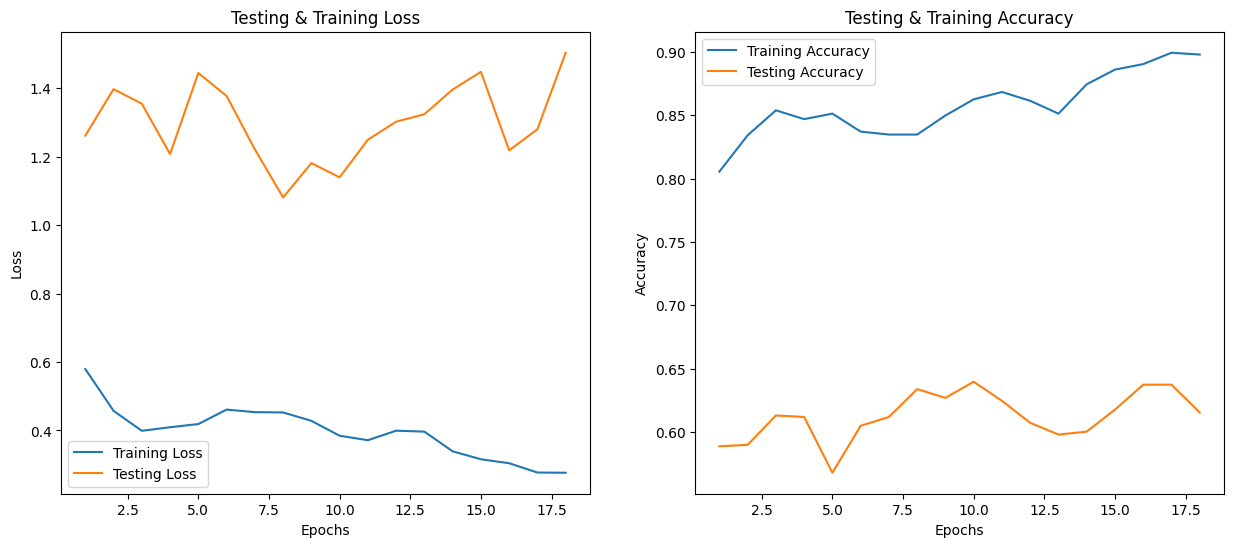

In [ ]:
train_loss=hist.history['loss']
test_loss=hist.history['val_loss']
train_accuracy=hist.history['accuracy']
test_accuracy=hist.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)
fig, ax = plt.subplots (1,2)
fig. set_size_inches (15,6)
ax[0].plot(epochs, train_loss, label='Training Loss')
ax[0].plot(epochs, test_loss, label='Testing Loss')
ax[0].set_title( 'Testing & Training Loss')
ax[0].legend ()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')


ax[1].plot(epochs, train_accuracy, label='Training Accuracy')
ax[1].plot(epochs, test_accuracy, label='Testing Accuracy')
ax[1].set_title('Testing & Training Accuracy')
ax[1].legend ( )
ax[1].set_xlabel( 'Epochs')
ax[1].set_ylabel('Accuracy')
model.save('/content/drive/MyDrive/emotion_model.h5')


25/25 ━━━━━━━━━━━━━━━━━━━━ 182s 5s/step - accuracy: 0.3385 - loss: 1.7022 - val_accuracy: 0.3801 - val_loss: 1.6091 - learning_rate: 0.0100


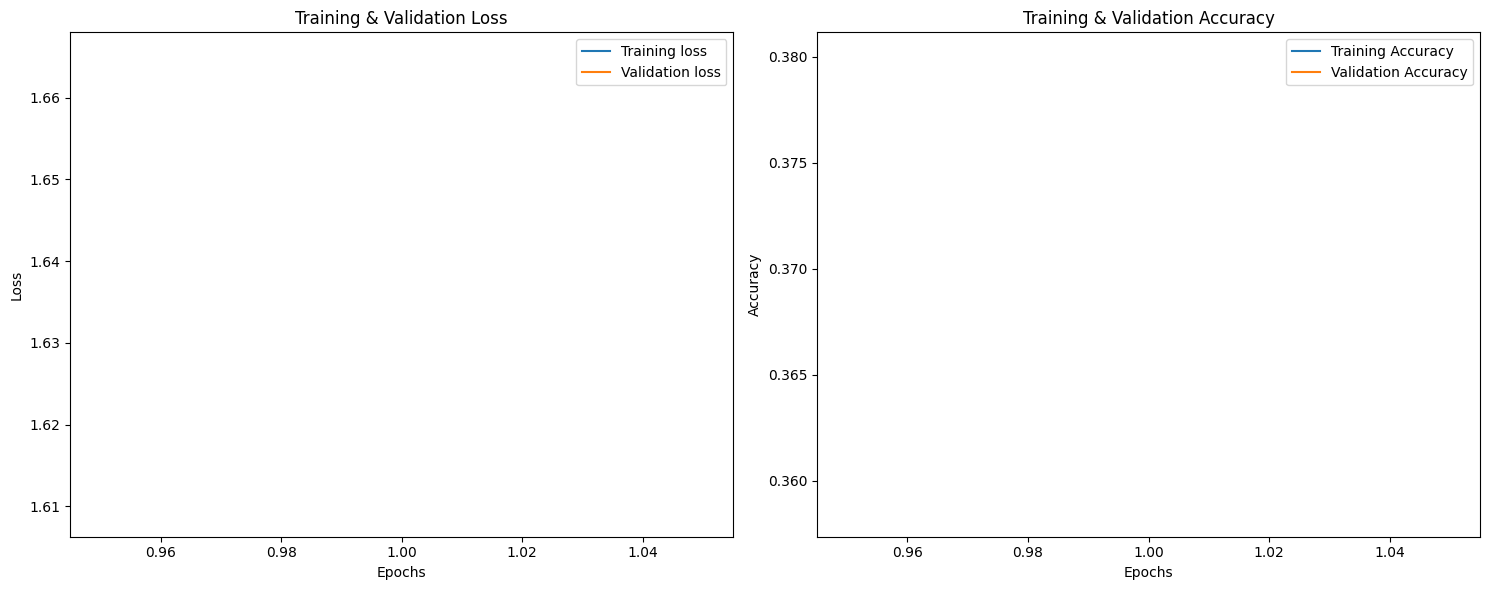

In [ ]:
'''import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# إعداد النموذج
opt = Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.6, verbose=1, patience=5, min_lr=1e-8)
stop = EarlyStopping(monitor='val_loss', patience=7)

# التدريب (هنا 1 epoch بس، للتجريب)
hist = model.fit(trainX, y_train, batch_size=140, epochs=1,
                 validation_data=(testX, y_test), callbacks=[reduce, stop])

# استخراج النتائج من history
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

# عدد الإيبوكس الحقيقي اللي انعملت (لو غير 80)
epochs = range(1, len(train_loss) + 1)

# الرسم
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Loss
ax[0].plot(epochs, train_loss, label='Training loss')
ax[0].plot(epochs, val_loss, label='Validation loss')
ax[0].set_title('Training & Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Accuracy
ax[1].plot(epochs, train_acc, label='Training Accuracy')
ax[1].plot(epochs, val_acc, label='Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.tight_layout()
plt.show()

# حفظ الموديل
model.save('D:\\emotions\\emotion_model.h5')'''


In [ ]:
emotion_model = load_model('/content/drive/MyDrive/emotion_model.h5')
y_pred = emotion_model.predict(testX)

27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 316ms/step


In [ ]:
predY = encoder.inverse_transform(y_pred)
testY = encoder.inverse_transform(y_test)

#get_emotion(predY.flatten()[6])
emotions_predict = [get_emotion(value) for value in predY.flatten()]
emotions_actual = [get_emotion(value) for value in testY.flatten()]

df = pd.DataFrame(columns=['Actual Emotions','Predicted Emotions'])
df['Actual Emotions']=emotions_actual
df['Predicted Emotions']=emotions_predict

df.head(10)



,Actual Emotions,Predicted Emotions
0,surprised,surprised
1,calm,calm
2,fearfull,fearfull
3,calm,calm
4,sad,angry
5,netural,netural
6,calm,netural
7,calm,netural
8,sad,netural
9,sad,disgust


Text(170.72222222222223, 0.5, 'Actual Emotions')

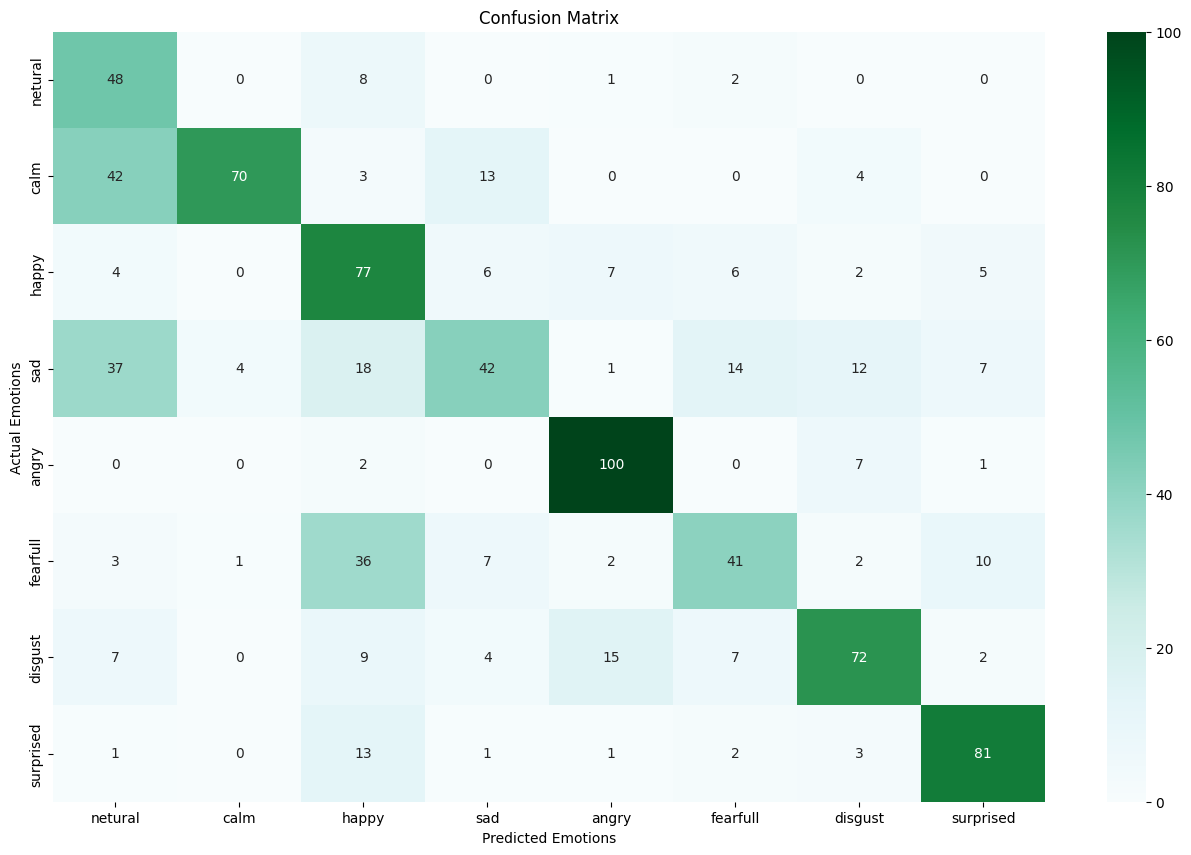

In [ ]:
cm = confusion_matrix(testY,predY)
emts = [get_emotion(em) for em in encoder.categories_[0]]
cmt = pd.DataFrame(cm, index = emts , columns= emts)
plt.figure(figsize=(16,10))
sns.heatmap(cmt, annot = True , fmt = '' , cmap = 'BuGn')
plt.title('Confusion Matrix')
plt.xlabel("Predicted Emotions")
plt.ylabel("Actual Emotions")

In [2]:
import gradio as gr
import numpy as np
import librosa
from tensorflow.keras.models import load_model

# تحميل النموذج المحفوظ
model = load_model('/content/drive/MyDrive/emotion_model.h5')

# تعريف أسماء المشاعر
emotion_map = {
    1: 'netural',
    2: 'calm',
    3: 'happy',
    4: 'sad',
    5: 'angry',
    6: 'fearfull',
    7: 'disgust',
    8: 'surprised'
}

def get_emotion(number):
    return emotion_map.get(number, "Unknown")

# دالة تجهيز الملف الصوتي
def read_and_process_audio(file_path):
    try:
        data, sample_rate = librosa.load(file_path, duration=2.4, offset=0.6)
        mfcc = librosa.feature.mfcc(y=data, sr=sample_rate)
        if mfcc.shape != (20, 104):
            return None
        x = np.expand_dims(mfcc, axis=0)       # (1, 20, 104)
        x = np.expand_dims(x, axis=-1)         # (1, 20, 104, 1)
        x = np.expand_dims(x, axis=-1)         # (1, 20, 104, 1, 1)
        x = np.swapaxes(x, 1, 2)               # (1, 104, 20, 1, 1)
        x = np.squeeze(x, axis=-1)             # (1, 104, 20, 1)
        return x
    except Exception as e:
        return None

# دالة التنبؤ بالمشاعر
results = []

def predict_emotion(audio_path):
    features = read_and_process_audio(audio_path)
    if features is None:
        return "الصوت غير مناسب أو غير قابل للمعالجة."
    prediction = model.predict(features)
    predicted_class = np.argmax(prediction, axis=1)[0] + 1
    emotion = get_emotion(predicted_class)

    results.append(predicted_class)  # نحفظ الرقم
    return f"المشاعر المتوقعة: {emotion}"


def depression_analysis():
    negative_emotions = [4, 5, 6, 7]
    negative_count = sum(1 for em in results if em in negative_emotions)

    if negative_count <= 3:
        status = "🔵 الحالة طبيعية ولا توحي بأعراض اكتئاب."
    elif 4 <= negative_count <= 7:
        status = "🟡 احتمال متوسط لوجود أعراض اكتئاب."
    else:
        status = "🔴 احتمال مرتفع لوجود أعراض اكتئاب. يُنصح بالتقييم النفسي."

    return f"عدد المشاعر السلبية: {negative_count} من 14\n\n{status}"
with gr.Blocks() as interface:
    gr.Markdown("## 🧠 تحليل المشاعر خلال 14 يومًا - نموذج الاكتئاب")

    audio_inputs = []
    for i in range(14):
        audio = gr.Audio(label=f"اليوم {i+1}", type="filepath")
        btn = gr.Button(f"تعرّف على المشاعر - اليوم {i+1}")
        output = gr.Textbox(label=f"النتيجة لليوم {i+1}")
        btn.click(fn=predict_emotion, inputs=audio, outputs=output)
        audio_inputs.append(audio)

    analyze_btn = gr.Button("🔍 تحليل الحالة النهائية")
    final_output = gr.Textbox(label="تقرير الاكتئاب")

    analyze_btn.click(fn=depression_analysis, inputs=[], outputs=final_output)

interface.launch()


ModuleNotFoundError: No module named 'gradio'